In [1]:
#euler test
import numpy as np

r = np.asarray([0,1,0])
center = np.asarray([0,0,0])
r_centered = r-center
print(r_centered)

a = 90
b = 0
y = 00

from scipy.spatial.transform import Rotation

A = Rotation.from_euler('XYZ',[y, b, a], degrees=True)

rotation_matrix = A.as_matrix()
print(rotation_matrix)


#[190.64 149.49 202.24] -> [280.64        99.50677852 342.22322148]


r_centered_rotated = rotation_matrix@r_centered
r_centered_rotated_shifted = r_centered_rotated+center

print(r_centered_rotated_shifted)


[0 1 0]
[[ 2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  2.22044605e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[-1.00000000e+00  2.22044605e-16  0.00000000e+00]


In [2]:
# shell map

import numpy as np  
import b0
b0map_oneinsert = b0.b0()
filename_to_import_csv_data_from = r'./data/240828/moved_bars_shell_R120_100pts_bvals.csv'
b0map_oneinsert.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,0])



No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240828/moved_bars_shell_R120_100pts_bvals.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240828/moved_bars_shell_R120_100pts,,,,,,
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, 

In [3]:
#calculate preliminary homogeneity
rawdata = b0map_oneinsert.fieldDataAlongPath
filteredB0vals = np.zeros(len(rawdata))

for idx,val in enumerate(rawdata):
    B0 = val[0]
    if B0 == 0:
        val = rawdata[idx-1]
        B0=val[0]
    filteredB0vals[idx]=B0
    
print(max(filteredB0vals))
print(min(filteredB0vals))
meanval = np.nanmean(filteredB0vals)

for idx,val in enumerate(filteredB0vals):
    if abs(val/meanval)>2 or abs(val/meanval)<0.5 or val/meanval<0:
        filteredB0vals[idx] = filteredB0vals[idx-1]
        print(val)
        
maxval = max(filteredB0vals)
minval = min(filteredB0vals)
meanval = np.nanmean(filteredB0vals)

print(maxval)
print(minval)
print(meanval)

homoshell = (maxval-minval)/meanval*1e6

print('homo on shell:%.0f'%homoshell)



48.284
-49.689
20.0
0.793
8.446
1.0
47.295
48.284
22.0
-45.862
-49.689
-48.041561699999995
homo on shell:-79660


In [ ]:
# reorder the data to a rectangular grid.

In [4]:
# change coordinates to magnet
b0map_oneinsert.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 100,stepsize=10)


ROTATING THE PATH NOW!
path center set to:  [-9.89075488e-16 -5.43423084e-15 -8.73114914e-15]
ROTATING THE MAGNET NOW!
len(path.r)= 10000
len(b0Data)= 10000
-119.98999999999998  < x <  119.98999999999998
-119.99000000000001  < y <  119.98999999999998
-119.97000000000001  < z <  119.96999999999997
[0.14999999999997726, 0.2599999999999909, 0.38999999999998636, 0.4900000000000091, 0.6100000000000136, 0.7300000000000182, 0.8499999999999659, 0.9500000000000455, 1.0699999999999932, 1.1800000000000068, 1.2999999999999545, 1.400000000000034, 1.509999999999991, 1.6100000000000136, 1.7199999999999704, 1.829999999999984, 1.920000000000016, 2.0300000000000296, 2.1200000000000045, 2.2199999999999704, 2.3100000000000023, 2.410000000000025, 2.4899999999999523, 2.580000000000041, 2.659999999999968, 2.75, 2.819999999999993, 2.900000000000034, 2.9699999999999704, 3.0400000000000205, 3.1100000000000136, 3.169999999999959, 3.230000000000018, 3.3000000000000114, 3.3400000000000034, 3.4000000000000057, 3.44

c:\cosi-measure\Software\COSI2\b0.py:308: RuntimeWarning: divide by zero encountered in scalar divide
  if meanField_raw/abs(self.fieldDataAlongPath[idx,0])>filtering:


In [19]:

# spherical decomposition
diameter_of_sphere = b0map_oneinsert.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_oneinsert.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=10
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_oneinsert.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)

240.01262383466417
(24, 24, 24)
Mean field strength in 24 cm sphere: -47.91 mT
Inhomogeneity in 24 cm sphere: -57145 ppm
Inhomogeneity of fit: 55563 ppm
Error: -170286 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 10 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 541770103 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


mean, mT:  -59.04396533076193
low, mT: -17222.80539878959 
high, mT: 14765.449792605727


<Figure size 640x480 with 0 Axes>

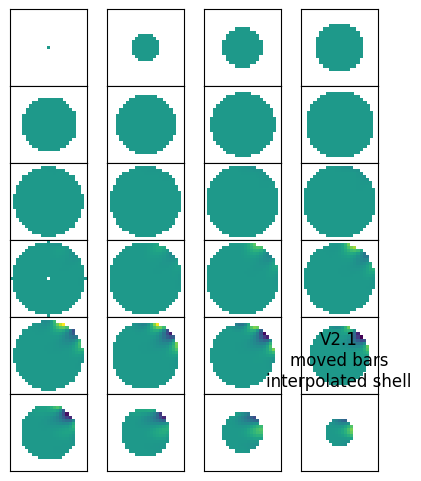

In [20]:
# ONE MAGNET field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(5, 6))

xvals = b0map_oneinsert.xDim_SPH_fine
FieldMeasured = b0map_oneinsert.interpolatedField #b0Data[:,:,:,0] # - b0map_noinsert.interpolatedField

print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))

for i in range(6):
    for j in range(4):
        xxx = axes[i,j].imshow(FieldMeasured[i*4+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower')
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('V2.1\nmoved bars\ninterpolated shell')

plt.savefig('./pics/ONEISNERT_FIELD.png',format="png")
plt.savefig('./pics/ONEINSERT_FIELD.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:

#??? lets generate a shim field of one insert.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2)

In [ ]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets
STRENGTH_FACTOR = 1.00

NEW_B_REM = 1.35*STRENGTH_FACTOR#
bRem                = NEW_B_REM # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 160*1e-3#260*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


In [ ]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
insert_nr = 0 # IRL 3!!!
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 3, y~0, min(|z|)
            if (segmentAngle > 360/12*(insert_nr-0.5)) and (segmentAngle < 360/12*(insert_nr+0.5)):
                # choose only Ring 0:
                if ringPosition == ringPositions[0]:
                    #position[0] = -0.07 #!!!!! TEMP!!!!!
                    #position[1] -=0.016 #!!!!! TEMP!!!!!
                    #print(360/12*(insert_nr-0.5),360/12*(insert_nr+0.5))
                    positions.append(position)
                    

print(len(positions))

for pos in positions:
    pos[0]=-86e-3
    pos[1]+=0e-3
    pos[2]+=0e-3
    print(pos[0],pos[1],pos[2])


In [ ]:

import matplotlib.pyplot as plt
for idx,position in enumerate(positions):

    plt.scatter(position[1],position[2],color = [idx/len(positions),0,0])

plt.xlabel('Y')
plt.ylabel('Z')
plt.show()


initialField = b0map_oneinsert.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_oneinsert.coord_grid_fine



magnetFields = np.zeros((np.shape(coordinate_grid[0])+(3,numMags)), dtype = np.float32)

from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_oneinsert.xDim_SPH_fine)#b0map.path.radius*2




for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = NEW_B_REM # T
    magnet.rotation_yz = 0
    magnet.position = position
    magnet.render_field(grid=coordinate_grid)
    shimming_magnets.append(magnet)
    
    
    #magnetFields[:,:,:,2,idx1] = magnet.B0[:,:,:,2]
    #magnetFields[:,:,:,1,idx1] = magnet.B0[:,:,:,1]
    #magnetFields[:,:,:,0,idx1] = magnet.B0[:,:,:,0]
    
    
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position, 
                                                        simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                        resolution=1/resolution_of_sph_fit*1e3,
                                                        plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    
    
    
magnetFields *= 1e3



print(DSV)




In [ ]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

v=max(b0map_oneinsert.xDim_SPH_fine)
magnet_index = 0
for i in range(2):
    alpha = i*2*np.pi/6
    
    cheapfield = magnetFields[12,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[12,:,:,1,magnet_index]*np.sin(alpha)   
     
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,-v,v],origin='lower')
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = alpha
    magnet.bRem = NEW_B_REM
    magnet.render_field(grid=coordinate_grid)

    plt.imshow(1e3*(magnet.B0[12,:,:,2]),vmin=-1e-3, vmax=1e-3,extent=[-v,v,-v,v],origin='lower')
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.show()
    
    # DIFF
    plt.imshow(1e3*(magnet.B0[12,:,:,2])-cheapfield,vmin=-1e-8, vmax=1e-8,extent=[-v,v,-v,v],origin='lower')
    plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

In [ ]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_oneinsert.xDim_SPH_fine*1e0
Y = b0map_oneinsert.yDim_SPH_fine*1e0
Z = b0map_oneinsert.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(len(positions)):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = np.pi

    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 5e-5
yzsliceindex = 5
mpbl = ax.contourf(y2d,z2d,(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_one_INSERT_R0I3.png',format="png")
plt.savefig('./pics/field_of_one_INSERT_R0I3.pdf',format="pdf")

plt.show()

In [ ]:
# RENDERING FIELDS OF SHIM MAGNETS

MagnetsField_simulated = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    print(magnet.position)
    alpha =-np.pi/2#!TEMP-np.pi/2
    magnet.bRem = NEW_B_REM # T
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    MagnetsField_simulated += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_oneinsert.sphere_mask
MagnetsField_simulated*=1e3 #!!! IMPORTANT !!!

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))


In [ ]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_oneinsert.xDim_SPH_fine

d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(6):
        #xxx = axes[j,i].imshow(oneMagnetField_simulated[:,:,i+j*5],clim=[-0.00000087,-0.00000073])
        xxx = axes[j,i].imshow(MagnetsField_simulated[i+j*5,:,:],clim=[np.nanmin(MagnetsField_simulated),np.nanmax(MagnetsField_simulated)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('R0_I3 one insert, expected,\nmagnet coordinates')

plt.savefig('./pics/one_INSERT_R0I3_field_expected.png',format="png")
plt.savefig('./pics/one_INSERT_R0I3_field_expected.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
# measured - expected:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_oneinsert.xDim_SPH_fine
Field_measured = b0map_oneinsert.interpolatedField

d = np.shape(coordinate_grid[0])
print(d[0])

print(np.nanmax(Field_measured))
print(np.nanmax(MagnetsField_simulated))


MagnetsField_simulated_SCALED = MagnetsField_simulated*1.0 #!!! TEMP

print((np.nanmax(Field_measured-MagnetsField_simulated_SCALED)-np.nanmin(Field_measured-MagnetsField_simulated_SCALED))/np.nanmean(Field_measured)*1e6,'PPM')

for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(Field_measured[i+j*5,:,:]-MagnetsField_simulated_SCALED[i+j*5,:,:],clim=[np.nanmin(Field_measured-MagnetsField_simulated_SCALED),np.nanmax(Field_measured-MagnetsField_simulated_SCALED)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('DIFF MEAS-SIM')

plt.savefig('./pics/DIFF_one_INSERT_field.png',format="png")
plt.savefig('./pics/DIFF_one_INSERT_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:
# now least squares for magnet rotation.
# generating the magnetic fields:
# magnet field is magnetFields[:,:,:,2,0]
# mask the magnet fields
# DSV = b0map.path.radius*2 # DEFINED ABOVE!
b0map = b0map_oneinsert

DSV_INNER = b0map.path.radius*1.5 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(sphereMask))

maskedFields =magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #




In [ ]:

# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

In [ ]:
sliceidx = 12
plt.imshow(Field_measured[sliceidx,:,:],clim=[np.nanmin(Field_measured),np.nanmax(Field_measured)])
plt.title('MEASURED')
plt.colorbar()
plt.show()

MagnetsField_simulated_SCD = MagnetsField_simulated*0.87

plt.imshow(MagnetsField_simulated_SCD[sliceidx,:,:],clim=[np.nanmin(Field_measured),np.nanmax(Field_measured)])
plt.title('SIMULATED')
plt.colorbar()
plt.show()
plt.imshow(Field_measured[sliceidx,:,:]-MagnetsField_simulated_SCD[sliceidx,:,:],clim=[-0.005,0.005])
plt.colorbar()
plt.title('DIFFERENCE')


initialFieldMasked = FieldMeasured[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured))

In [ ]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting_expensive(shimVector):
# super expensive render of each magnet
    shimfield = MagnetsField_simulated*0

    for idx,magnet in enumerate(shimming_magnets):
        angle = shimVector[idx]
        magnet.rotation_yz = angle
        magnet.render_field(grid=coordinate_grid)
        shimfield+=magnet.B0[:,:,:,2]*1e3
        
    combined_field = shimfield+initialField
    homo = (np.nanmax(combined_field)-np.nanmin(combined_field))/np.nanmean(combined_field)
    return homo




def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked*1.00,stackedRotationVector)+initialFieldMasked

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

In [ ]:
#render the field of rotated magnets
optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#-np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
#optimized_vector_of_magnet_rotations = np.load('opt1e3.npy')
shimming_magnets[0].render_field(coordinate_grid)
shimFieldRendered = shimming_magnets[0].B0*0

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    magnet.bRem = NEW_B_REM # T
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0
    
shimFieldRendered*=1e3#e3*NEW_B_REM

optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))


 
plt.imshow(shimFieldRendered[6,:,:,2])
plt.show()
plt.imshow(optimized_shim_Field[6,:,:]-shimFieldRendered[6,:,:,2],vmin=-1e-9,vmax=1e-9,origin='lower')
plt.colorbar()
plt.show()


In [ ]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('opt1e3_onetray.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+3*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting_expensive, initialGuess, max_nfev=6400, xtol = 1e-9,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


In [ ]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('opt1e3_onetray',optimized_vector_of_magnet_rotations)
#np.save('opt336magnets_27mm_1607ppm',optimized_vector_of_magnet_rotations)
print(optimized_vector_of_magnet_rotations*180/np.pi)
print(np.mean(optimized_vector_of_magnet_rotations*180/np.pi))
#print(optimized_vector_of_magnet_rotations)

shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM
    #pos = positions[idx]
    #magnet.position = positions[idx]
    #magnet.update_rotation(rotation_yz=alpha+0*np.pi/2)
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimField_fair = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


optimized_shim_Field =np.matmul(magnetFields[...,1,:], np.sin(lsqData.x)) + np.matmul(magnetFields[...,2,:], np.cos(lsqData.x))
#print(np.shape(optimizedField))



shimmed_Field_final = initialField+optimized_shim_Field

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimField_fair)-np.nanmin(shimField_fair))/np.nanmean(shimField_fair)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


In [ ]:
# SHIM FIELD
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_oneinsert.xDim_SPH_fine

shimoffset = 0# np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])




for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(shimFieldRendered[i+j*5,:,:]*1e3,clim=[1.00*np.nanmin(optimized_shim_Field)+shimoffset,1.00*np.nanmax(optimized_shim_Field)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIM FIELD')

plt.savefig('./pics/shim_field_ONEINSERT_TEST.png',format="png")
plt.savefig('./pics/shim_field_ONEINSERT_TEST.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()



In [ ]:
# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_oneinsert.xDim_SPH_fine


shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimmed_Field_final = initialField+optimized_shim_Field

for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(shimField_fair[i+j*5,:,:],clim=[1.00*np.nanmin(initialField),1.00*np.nanmax(initialField)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED FIELD')

plt.savefig('./pics/shimmed_field_ONEINSERT_TEST.png',format="png")
plt.savefig('./pics/shimmed_field_ONEINSERT_TEST.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
# MAGNET ROTATIONS
#plotting rotations


plt.figure(0)

print('cos pi=',np.cos(np.pi))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
rdisp = 3e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    angle = optimized_vector_of_magnet_rotations[idx] # !!!+
    print(tmppos[1],tmppos[2],angle*180/np.pi)
    axes.plot(tmppos[1],tmppos[2],'xk')
    direction = [rdisp*np.cos(angle),rdisp*np.sin(angle)]
    axes.plot(tmppos[1]+direction[0],tmppos[2]+direction[1],'rv')
    axes.plot([tmppos[1],tmppos[1]+direction[0]],[tmppos[2],tmppos[2]+direction[1]],'k-')

#plt.xlim([-0.1,0.1])
#plt.ylim([-0.3,-0.1])

plt.xlabel('Y')
plt.ylabel('Z')
